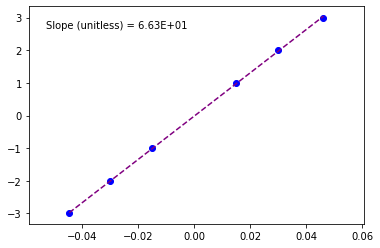

0.006266729932100227
6.03169093876924e-07
1.5079335069729906e-08


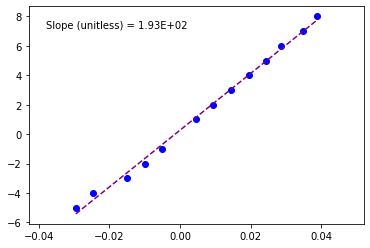

0.0064409985373773525
6.480920596422856e-07
5.184781649687752e-09


In [19]:
import numpy as np
import matplotlib.pyplot as plt

#tan(theta)= (ysubm)/l
#dsin(theta)=mlambda

#asin(theta)=plambda
#tan(theta)= (ysubp)/l
def err(x, dy):
    err = (sum(1/dy**2))*(sum(x**2/dy**2))-(sum(x/dy**2))**2
    return err
def rule4(dA,A,m,dB,B,n,dC,C,p,Q):
    dQ = Q*np.sqrt(((m*dA/A)**2)+((n*dB/B)**2)+((p*dC/C)**2))
    return dQ
#diffraction
L=6
dl=.02
a=.00004
da=.000001
p=np.array([-3,-2,-1,1,2,3])
dp=np.array([.1,.1,.1,.1,.1,.1])
yp=np.array([-.268,-.18,-.09,.09,.18,.277])#,-9,-18,-26.8
dyp=np.array([.0005,.0005,.0005,.0005,.0005,.0005])
theta=np.arctan(yp/L)
sintheta=np.sin(theta)

x=sintheta
y=p
dy=dp

b,m=np.polynomial.polynomial.polyfit(x,y,1,w=dy)
fit = b+m*x
error=err(x, dyp)
dm = np.sqrt(1/error*sum(1/dyp**2))

plt.scatter(sintheta, p, color='blue', marker='o')
plt.plot(sintheta, fit, color='purple', linestyle='--')
plt.annotate('Slope (unitless) = {value:.{digits}E}'.format(value=m, digits=2),
             (0.05, 0.9), xycoords='axes fraction')
plt.show()

wvlen=a/m
print(dm)
print(wvlen)
dwv=rule4(dm, m, 1, da, a, 1, 0, 1, 1, wvlen)
print(dwv)


d=.000125
dd=.000001
ml=np.array([-5,-4,-3,-2,-1,1,2,3,4,5,6,7,8])
dml=np.array([.1,.1,.1,.1,.1,.1,.1,.1,.1,.1,.1,.1,.1])
ym=np.array([-.177,-.147,-.09,-.059,-.03,.028,.057,.087,.118,.146,.172,.210,.233])
dym=np.array([.0005,.0005,.0005,.0005,.0005,.0005,.0005,.0005,.0005,.0005,.0005,.0005,.0005])
theta=np.arctan(ym/L)
sinthetam=np.sin(theta)

x=sinthetam
y=ml
dy=dml

b,m=np.polynomial.polynomial.polyfit(x,y,1,w=dy)
fit = b+m*x
error=err(x, dym)
dm = np.sqrt(1/error*sum(1/dym**2))

plt.scatter(sinthetam, ml, color='blue', marker='o')
plt.plot(sinthetam, fit, color='purple', linestyle='--')
plt.annotate('Slope (unitless) = {value:.{digits}E}'.format(value=m, digits=2),
             (0.05, 0.9), xycoords='axes fraction')
plt.show()

wvlen=d/m
print(dm)

print(wvlen)
dwv=rule4(dm, m, 1, dd, d, 1, 0, 1, 1, wvlen)
print(dwv)